In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.datasets import mnist

In [10]:
'''data loading'''

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [13]:
'''data reshaping and normalization'''

X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

In [14]:
from keras.utils.np_utils import to_categorical

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## FULLY CONNECTED

In [20]:
from keras import Sequential
from keras.layers import Dense
import keras.backend as k

In [23]:
'''fully connected CNN'''

k.clear_session()

model =  Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [24]:
h = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 189us/step - loss: 0.2521 - acc: 0.9224 - val_loss: 0.0958 - val_acc: 0.9703
Epoch 2/10
54000/54000 [==============================] - 9s 165us/step - loss: 0.0942 - acc: 0.9706 - val_loss: 0.0834 - val_acc: 0.9762
Epoch 3/10
54000/54000 [==============================] - 9s 159us/step - loss: 0.0627 - acc: 0.9806 - val_loss: 0.0892 - val_acc: 0.9772
Epoch 4/10
54000/54000 [==============================] - 7s 137us/step - loss: 0.0450 - acc: 0.9866 - val_loss: 0.0764 - val_acc: 0.9815
Epoch 5/10
54000/54000 [==============================] - 8s 157us/step - loss: 0.0346 - acc: 0.9893 - val_loss: 0.0745 - val_acc: 0.9815
Epoch 6/10
54000/54000 [==============================] - 8s 152us/step - loss: 0.0279 - acc: 0.9912 - val_loss: 0.0925 - val_acc: 0.9795
Epoch 7/10
54000/54000 [==============================] - 8s 152us/step - loss: 0.0220 - acc: 0.9928 - val_loss: 0.0939 - 

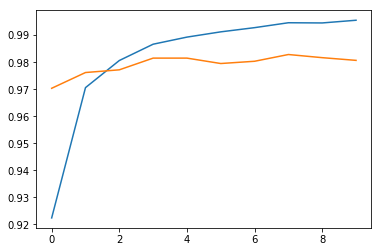

In [25]:
'''accuracy curves'''

plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

In [26]:
test_acc = model.evaluate(X_test, y_test)
test_acc

10000/10000 [==============================] - 1s 86us/step


[0.12057263498648772, 0.9798]

In [ ]:
# when we face an error that the train error is high means overfitting, so might need to get the different nn archtectiure